In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datasist as ds
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,10)},font_scale=1.2)
sns.set_palette('viridis')

In [2]:
df = pd.read_csv("loan_data.csv")
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe(include='all')

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,NaN,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000


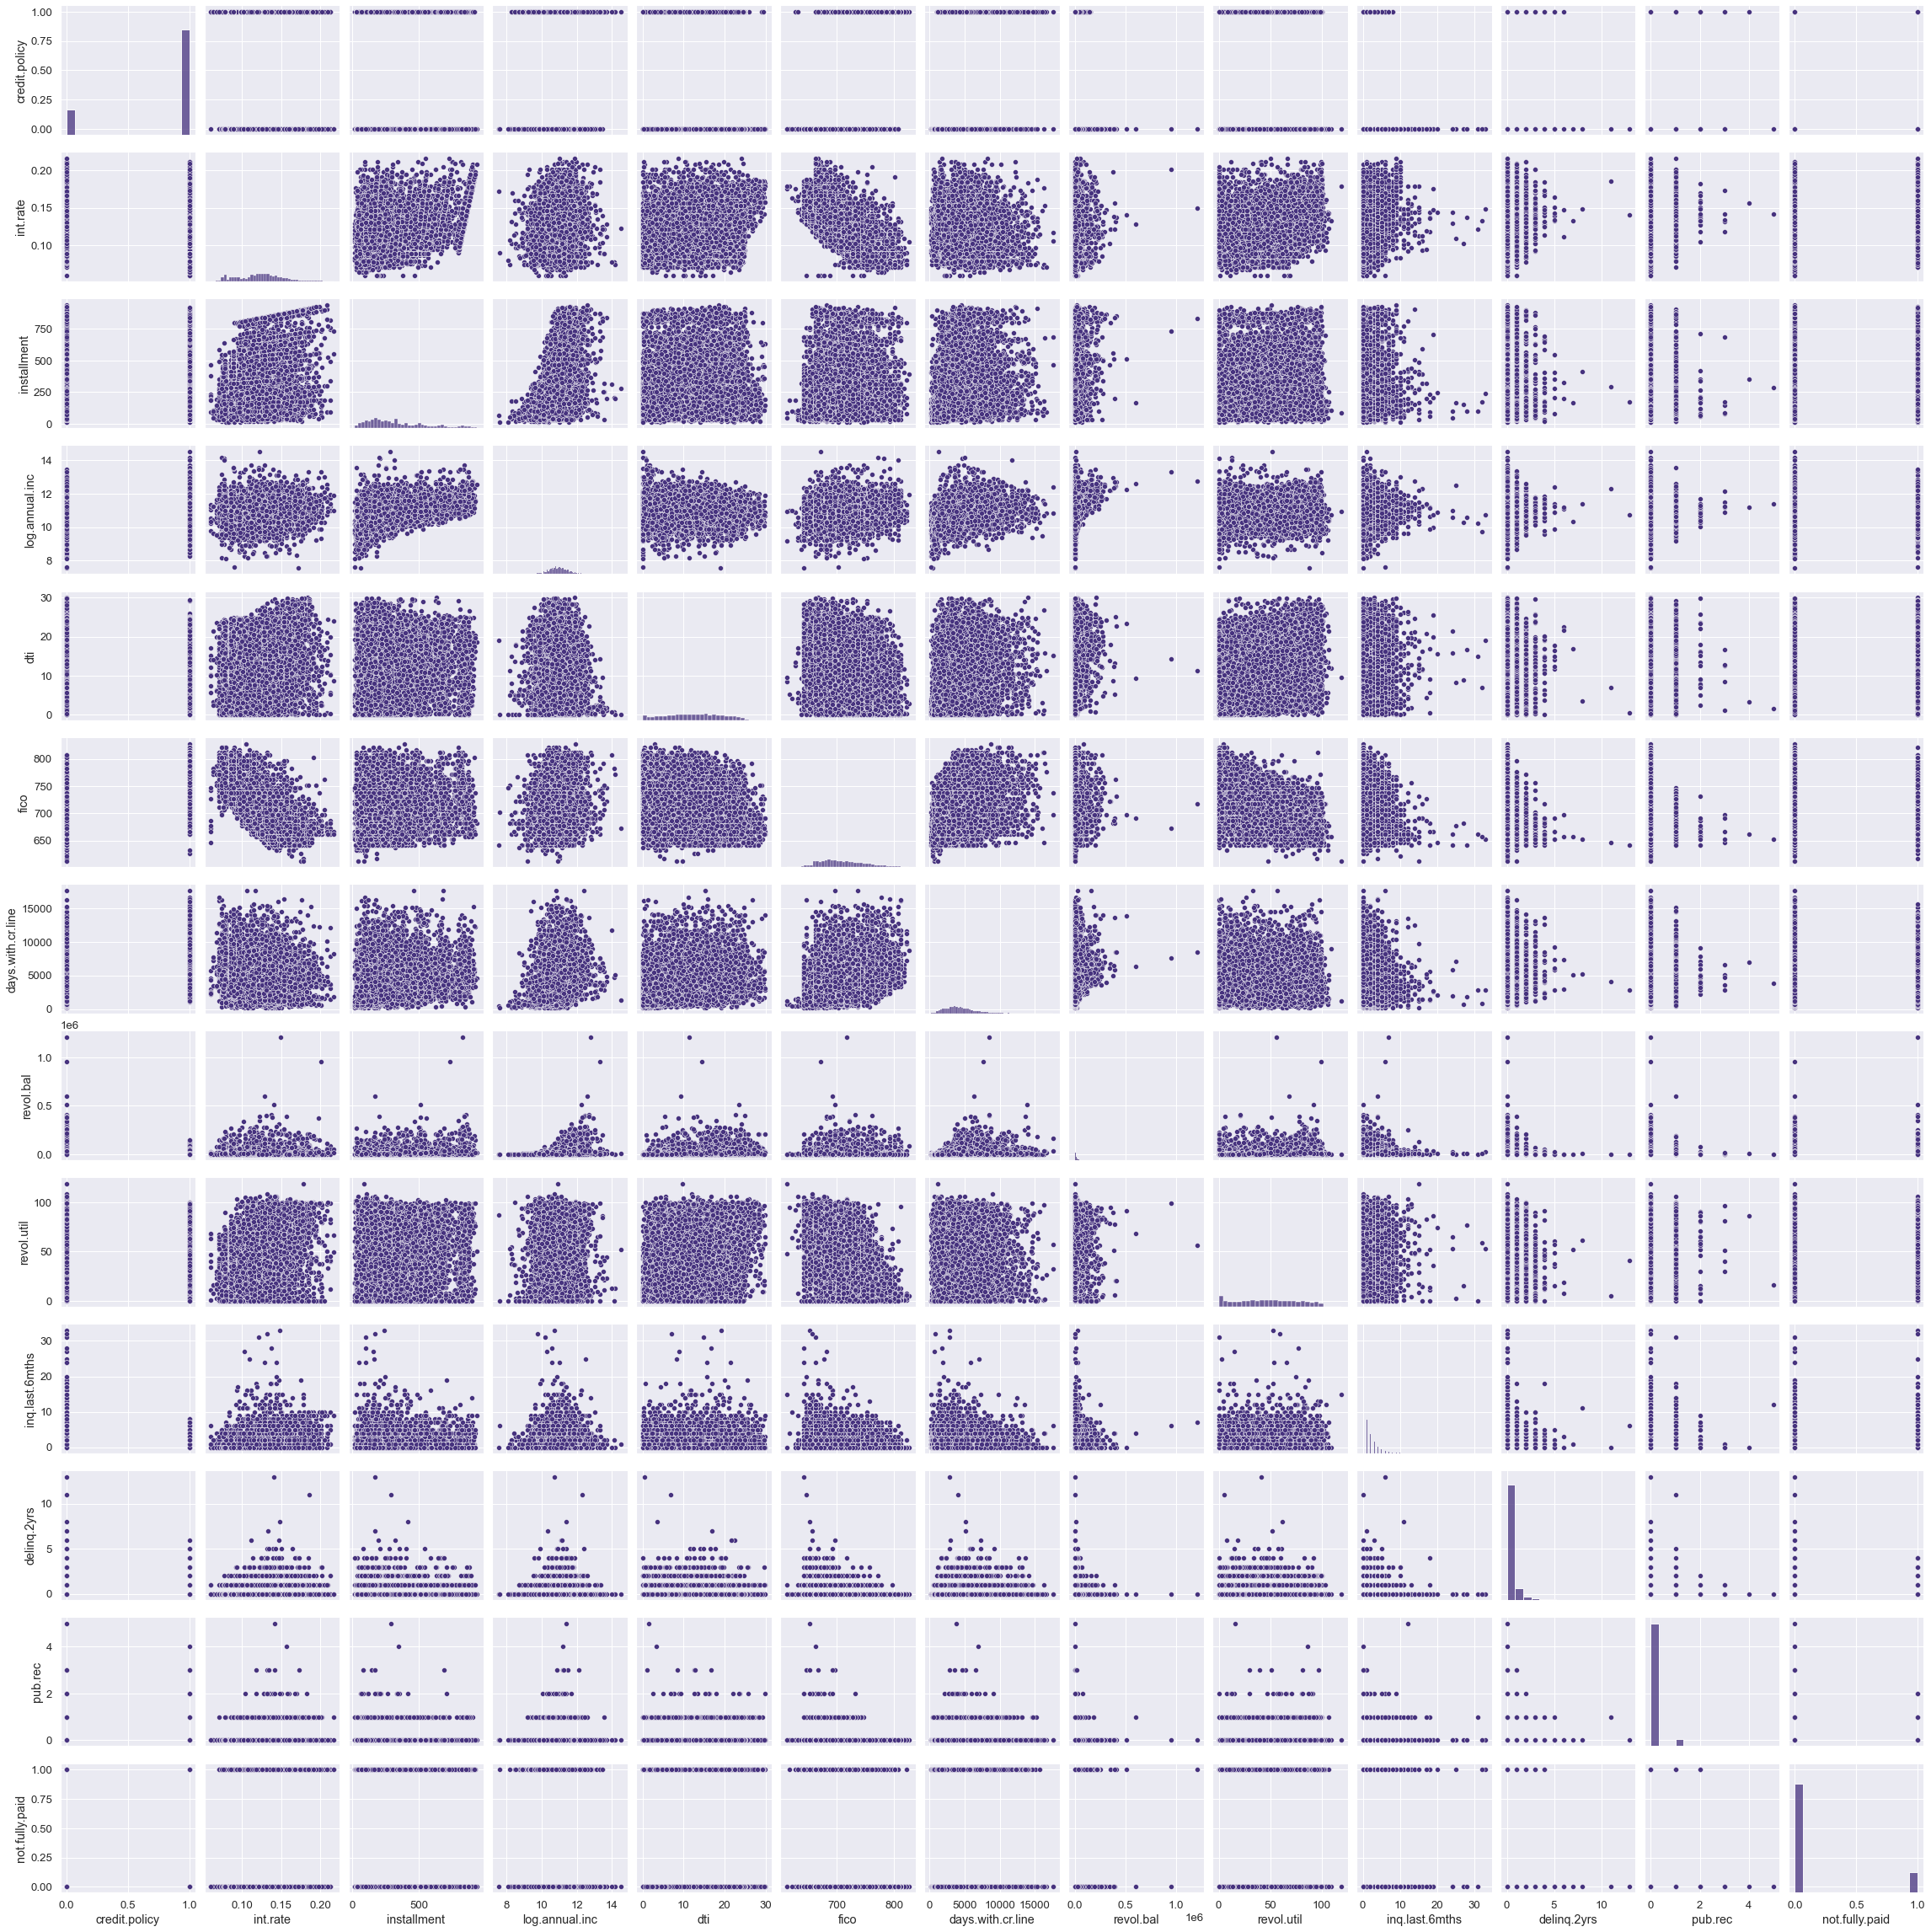

In [5]:
sns.pairplot(df)

<AxesSubplot:>

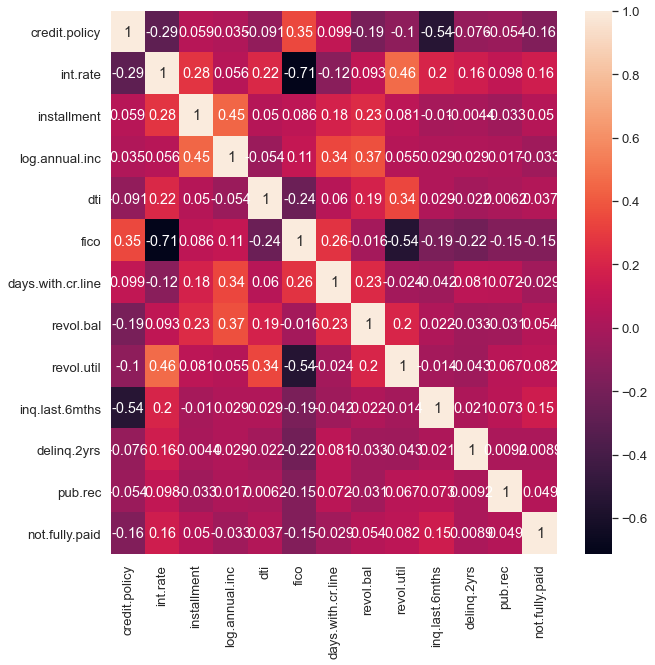

In [6]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

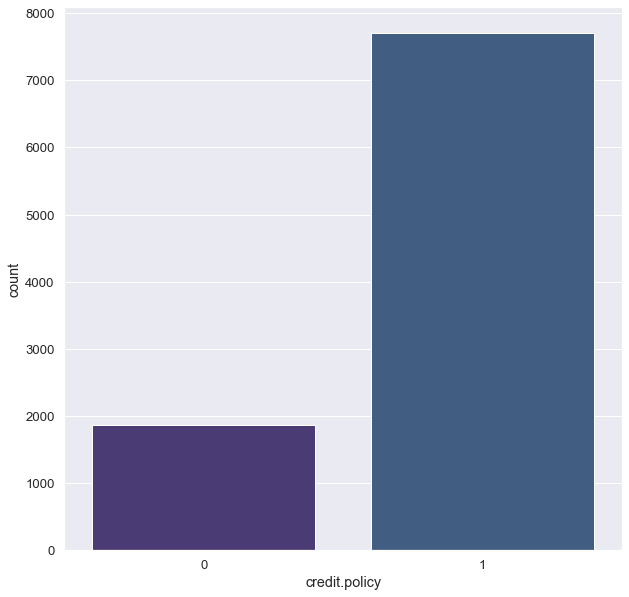

In [7]:
sns.countplot(df['credit.policy'])

<AxesSubplot:xlabel='purpose', ylabel='count'>

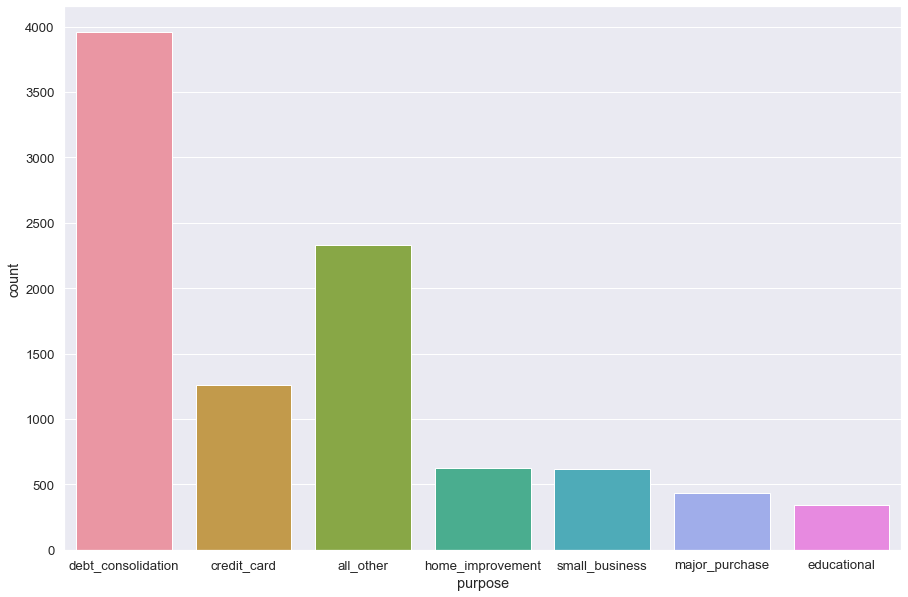

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(df['purpose'])

<AxesSubplot:xlabel='delinq.2yrs', ylabel='count'>

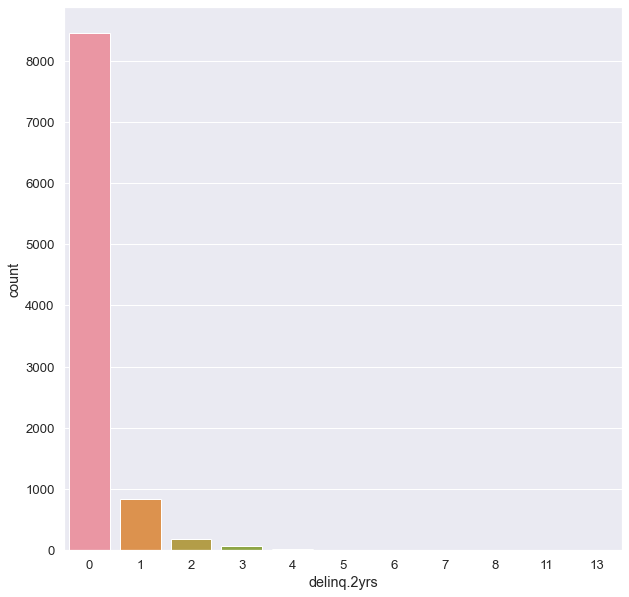

In [9]:
sns.countplot(df['delinq.2yrs'])

<AxesSubplot:xlabel='days.with.cr.line', ylabel='Density'>

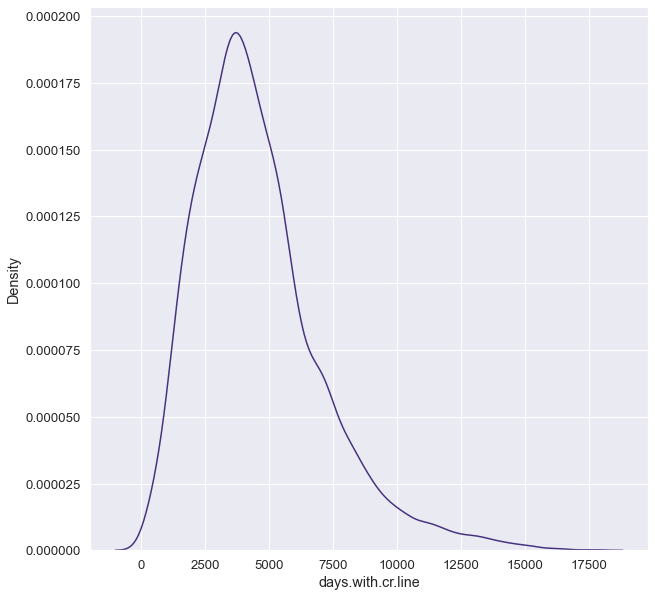

In [10]:
sns.kdeplot(df['days.with.cr.line'])

<AxesSubplot:xlabel='int.rate', ylabel='Density'>

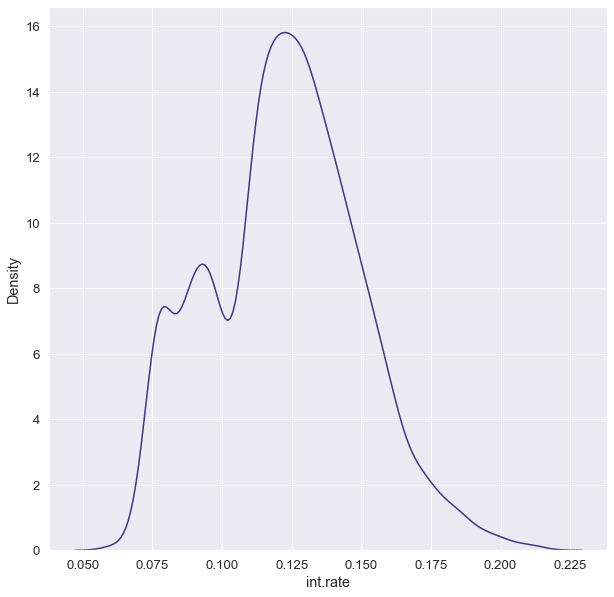

In [11]:
sns.kdeplot(df['int.rate'])

<AxesSubplot:xlabel='installment', ylabel='Density'>

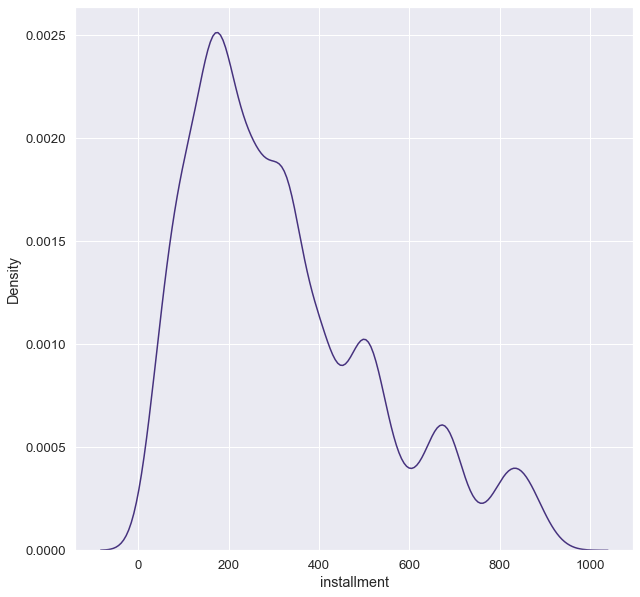

In [12]:
sns.kdeplot(df['installment'])

<AxesSubplot:xlabel='installment', ylabel='Density'>

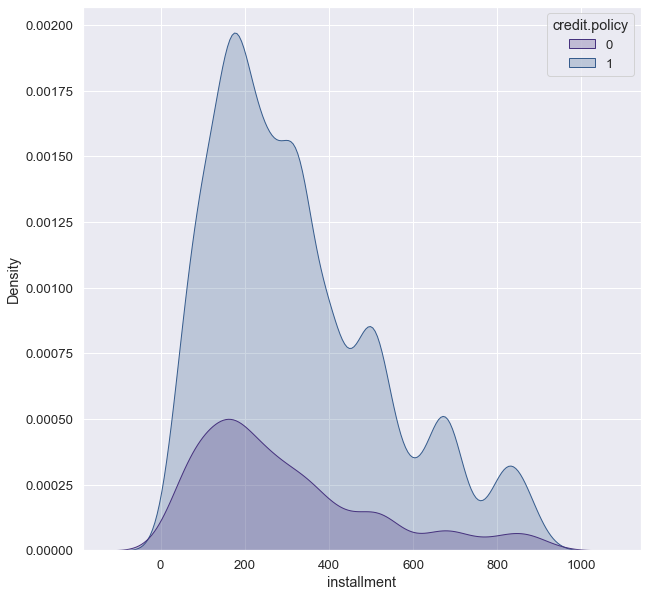

In [13]:
sns.kdeplot(df['installment'],hue=df['credit.policy'],shade=True)

<AxesSubplot:xlabel='installment', ylabel='Density'>

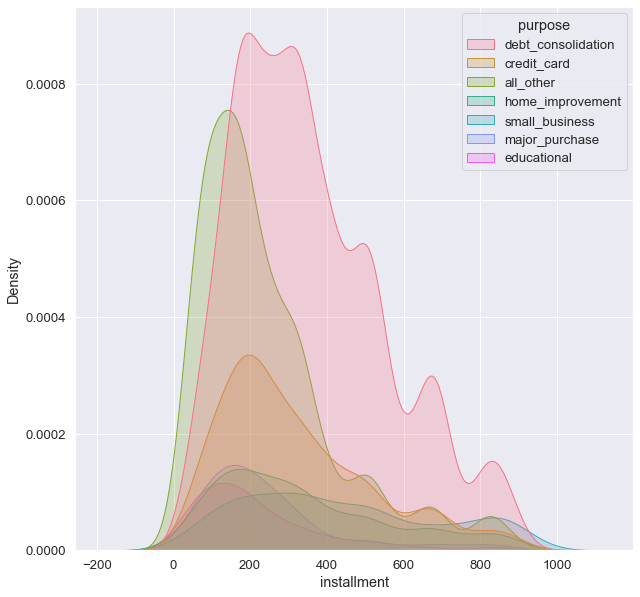

In [14]:
sns.kdeplot(df['installment'],hue=df['purpose'],shade=True)

<AxesSubplot:xlabel='installment', ylabel='purpose'>

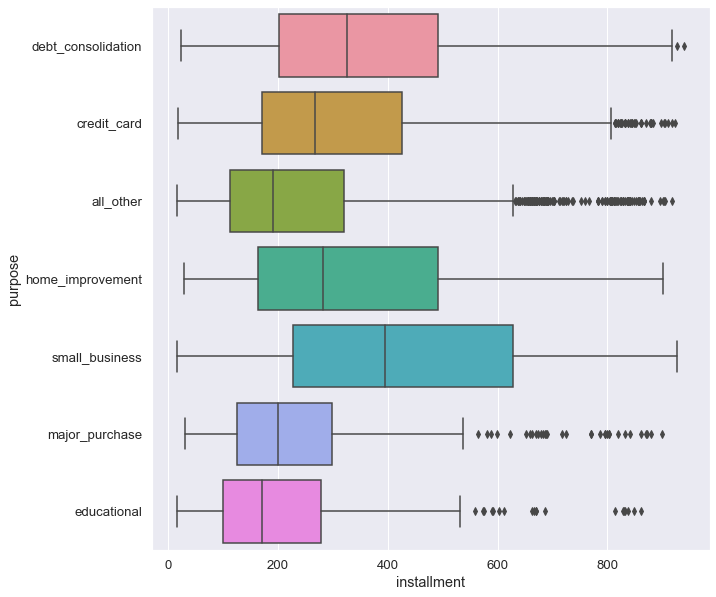

In [15]:
sns.boxplot(df['installment'],df['purpose'])

<AxesSubplot:xlabel='int.rate', ylabel='purpose'>

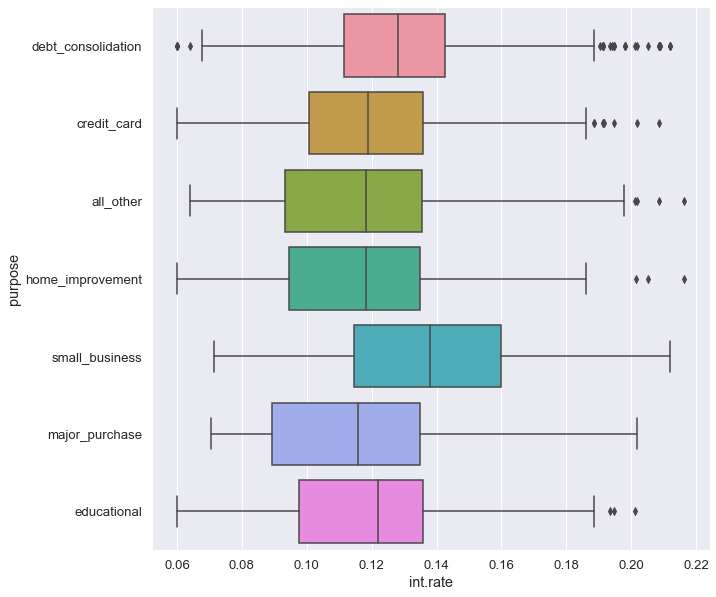

In [16]:
sns.boxplot(df['int.rate'],df['purpose'])

<AxesSubplot:xlabel='purpose', ylabel='count'>

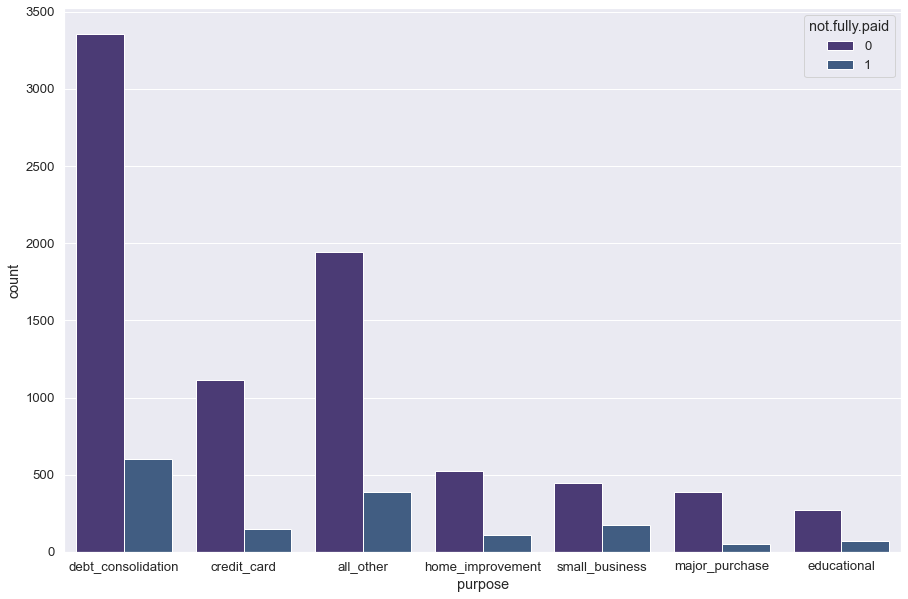

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(df['purpose'],hue=df['not.fully.paid'])

<AxesSubplot:xlabel='revol.util', ylabel='purpose'>

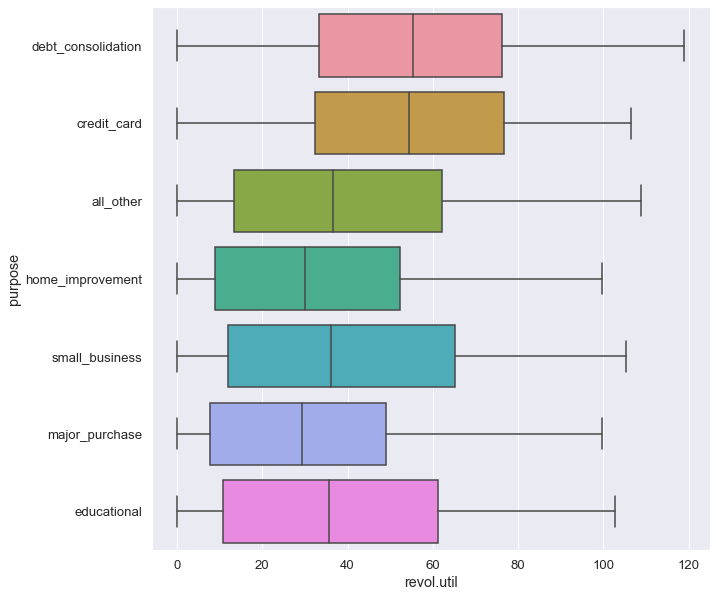

In [18]:
sns.boxplot(df['revol.util'],df['purpose'])

<AxesSubplot:xlabel='delinq.2yrs', ylabel='count'>

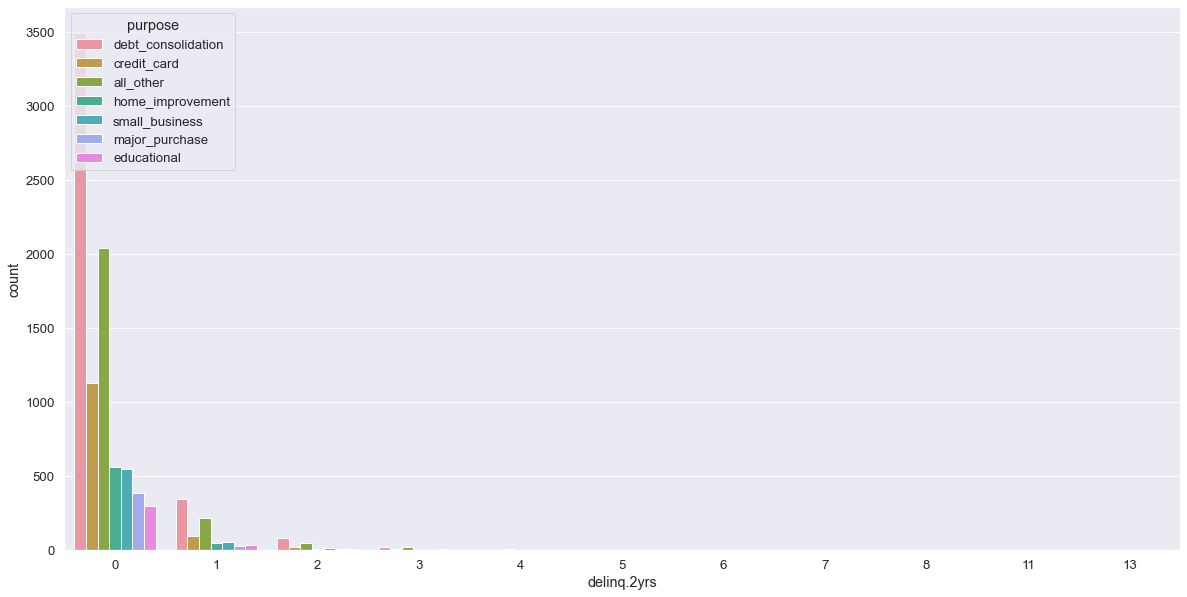

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(df['delinq.2yrs'],hue=df['purpose'])